### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, accuracy_score,recall_score,auc,confusion_matrix,classification_report
from sklearn.tree import plot_tree
import seaborn as sns
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

### Read the file and view it

In [2]:
data=pd.read_csv("classification_data.csv")

In [3]:
data.head(5)

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,Android,True,mobile,Sharjah,25.3463,55.4209,...,(not set),True,True,1900,0,5617,0,food////food////food,0,01-01-2021
1,9,1194,(Other),0,Android,True,mobile,Sharjah,25.3463,55.4209,...,(not set),True,True,1900,0,5617,0,food////food////food,0,01-01-2021
2,28,1816,Paid Search,0,Android,True,mobile,Ajman,25.4052,55.5136,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,01-01-2021
3,2,299,Paid Search,0,Android,True,mobile,Abu Dhabi,24.4539,54.3773,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,01-01-2021
4,2,299,Paid Search,0,Android,True,mobile,Abu Dhabi,24.4539,54.3773,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,01-01-2021


### EDA

In [4]:
data.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Length: 100000, dtype: int64

In [5]:
data.shape

(100000, 45)

In [6]:
dup_counts = data.duplicated().sum()

In [7]:
dup_counts

90793

In [8]:
data_2=data.drop_duplicates()

In [9]:
data_2.shape

(9207, 45)

In [10]:
data_2.dtypes

count_session               int64
count_hit                   int64
channelGrouping            object
totals_newVisits            int64
device_operatingSystem     object
device_isMobile              bool
device_deviceCategory      object
geoNetwork_region          object
geoNetwork_latitude       float64
geoNetwork_longitude      float64
historic_session            int64
historic_session_page       int64
youtube                     int64
avg_session_time          float64
avg_session_time_page     float64
single_page_rate          float64
sessionQualityDim           int64
last_visitId                int64
latest_visit_id             int64
visitId_threshold           int64
earliest_visit_id           int64
earliest_visit_number       int64
latest_visit_number         int64
time_earliest_visit       float64
time_latest_visit         float64
avg_visit_time              int64
days_since_last_visit       int64
days_since_first_visit      int64
visits_per_day            float64
bounce_rate   

In [11]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
count_session,9207.0,1.990800e+01,2.105902e+01,1.000000e+00,7.000000e+00,1.400000e+01,2.600000e+01,2.700000e+02
count_hit,9207.0,2.489794e+03,3.399778e+03,2.000000e+00,5.250000e+02,1.347000e+03,3.149000e+03,4.874400e+04
totals_newVisits,9207.0,1.238188e-02,1.105889e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
geoNetwork_latitude,9207.0,2.488703e+01,3.414327e+00,-3.392490e+01,2.445390e+01,2.520480e+01,2.520480e+01,5.932930e+01
geoNetwork_longitude,9207.0,5.427132e+01,8.852935e+00,-8.762980e+01,5.437730e+01,5.527080e+01,5.527080e+01,1.403187e+02
historic_session,9207.0,8.449205e+03,1.094549e+04,2.000000e+00,2.049000e+03,4.923000e+03,1.053800e+04,1.817150e+05
historic_session_page,9207.0,1.807768e+03,4.143497e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.008500e+03,9.989600e+04
youtube,9207.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
avg_session_time,9207.0,4.692371e+02,4.342812e+02,2.000000e+00,2.210540e+02,3.600000e+02,5.762938e+02,5.441000e+03
avg_session_time_page,9207.0,1.642882e+02,4.208421e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.358157e+02,5.441000e+03


In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   int64  
 4   device_operatingSystem  9207 non-null   object 
 5   device_isMobile         9207 non-null   bool   
 6   device_deviceCategory   9207 non-null   object 
 7   geoNetwork_region       9207 non-null   object 
 8   geoNetwork_latitude     9207 non-null   float64
 9   geoNetwork_longitude    9207 non-null   float64
 10  historic_session        9207 non-null   int64  
 11  historic_session_page   9207 non-null   int64  
 12  youtube                 9207 non-null   int64  
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null   floa

### Label Encoding

In [13]:
le = LabelEncoder()

In [14]:
data.select_dtypes(include="object").columns

Index(['channelGrouping', 'device_operatingSystem', 'device_deviceCategory',
       'geoNetwork_region', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array', 'target_date'],
      dtype='object')

In [15]:
for i in data_2.select_dtypes(include="object").columns:
    data_2[i] = list(map(str, data_2[i]))

C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\4224874381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[i] = list(map(str, data_2[i]))


In [16]:
data_2["channelGrouping"]=le.fit_transform(data_2["channelGrouping"])
data_2["device_operatingSystem"]=le.fit_transform(data_2["device_operatingSystem"])
data_2["device_deviceCategory"]=le.fit_transform(data_2["device_deviceCategory"])
data_2["geoNetwork_region"]=le.fit_transform(data_2["geoNetwork_region"])
data_2["earliest_source"]=le.fit_transform(data_2["earliest_source"])
data_2["latest_source"]=le.fit_transform(data_2["latest_source"])
data_2["earliest_medium"]=le.fit_transform(data_2["earliest_medium"])
data_2["latest_medium"]=le.fit_transform(data_2["latest_medium"])
data_2["earliest_keyword"]=le.fit_transform(data_2["earliest_keyword"])
data_2["latest_keyword"]=le.fit_transform(data_2["latest_keyword"])
data_2["products_array"]=le.fit_transform(data_2["target_date"])

C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\1197333329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["channelGrouping"]=le.fit_transform(data_2["channelGrouping"])
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\1197333329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["device_operatingSystem"]=le.fit_transform(data_2["device_operatingSystem"])
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\1197333329.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [17]:
data_2.select_dtypes(include="bool").columns

Index(['device_isMobile', 'earliest_isTrueDirect', 'latest_isTrueDirect'], dtype='object')

In [18]:
data_2["device_isMobile"]=le.fit_transform(data_2["device_isMobile"])
data_2["earliest_isTrueDirect"]=le.fit_transform(data_2["earliest_isTrueDirect"])
data_2["latest_isTrueDirect"]=le.fit_transform(data_2["latest_isTrueDirect"])


C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\1377964995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["device_isMobile"]=le.fit_transform(data_2["device_isMobile"])
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\1377964995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["earliest_isTrueDirect"]=le.fit_transform(data_2["earliest_isTrueDirect"])
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\1377964995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [19]:
data_2

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,0,0,1,1,1,71,25.3463,55.4209,...,3,1,1,1900,0,5617,0,0,0,01-01-2021
2,28,1816,2,0,1,1,1,2,25.4052,55.5136,...,2,1,1,3843,0,77417,1477195214,0,1,01-01-2021
3,2,299,2,0,1,1,1,1,24.4539,54.3773,...,75,1,1,592,0,1576,0,0,0,01-01-2021
16,3,507,2,0,6,1,1,1,24.4539,54.3773,...,74,1,1,507,0,1958,28745286,0,1,01-01-2021
20,9,1037,2,0,1,1,1,25,25.2048,55.2708,...,3,1,1,1674,0,138440,1054124685,0,1,01-01-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,1,24.4539,54.3773,...,47,1,1,471,0,278,0,0,0,01-01-2021
99907,28,3071,2,0,1,1,1,1,24.4539,54.3773,...,74,1,1,4071,0,3810,183879066,0,0,01-01-2021
99908,7,1018,2,0,6,1,1,25,25.2048,55.2708,...,74,1,1,7258,0,0,363923999,0,1,01-01-2021
99921,6,818,2,0,1,1,1,25,25.2048,55.2708,...,10,1,1,818,0,2958,0,0,0,01-01-2021


In [20]:
data_2['target_date'] = pd.to_datetime(data_2['target_date'], format='%d-%m-%Y')

C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\2914106537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['target_date'] = pd.to_datetime(data_2['target_date'], format='%d-%m-%Y')


In [21]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   count_session           9207 non-null   int64         
 1   count_hit               9207 non-null   int64         
 2   channelGrouping         9207 non-null   int32         
 3   totals_newVisits        9207 non-null   int64         
 4   device_operatingSystem  9207 non-null   int32         
 5   device_isMobile         9207 non-null   int64         
 6   device_deviceCategory   9207 non-null   int32         
 7   geoNetwork_region       9207 non-null   int32         
 8   geoNetwork_latitude     9207 non-null   float64       
 9   geoNetwork_longitude    9207 non-null   float64       
 10  historic_session        9207 non-null   int64         
 11  historic_session_page   9207 non-null   int64         
 12  youtube                 9207 non-null   int64       

### Visualization

In [22]:
def plot_cat(column_name):
    data_2 = data[column_name].value_counts()
    color = sns.color_palette("husl",len(data_2))
    plt.figure(figsize=(16,7))
    data_2.plot(kind="bar",color= color)
    plt.show()

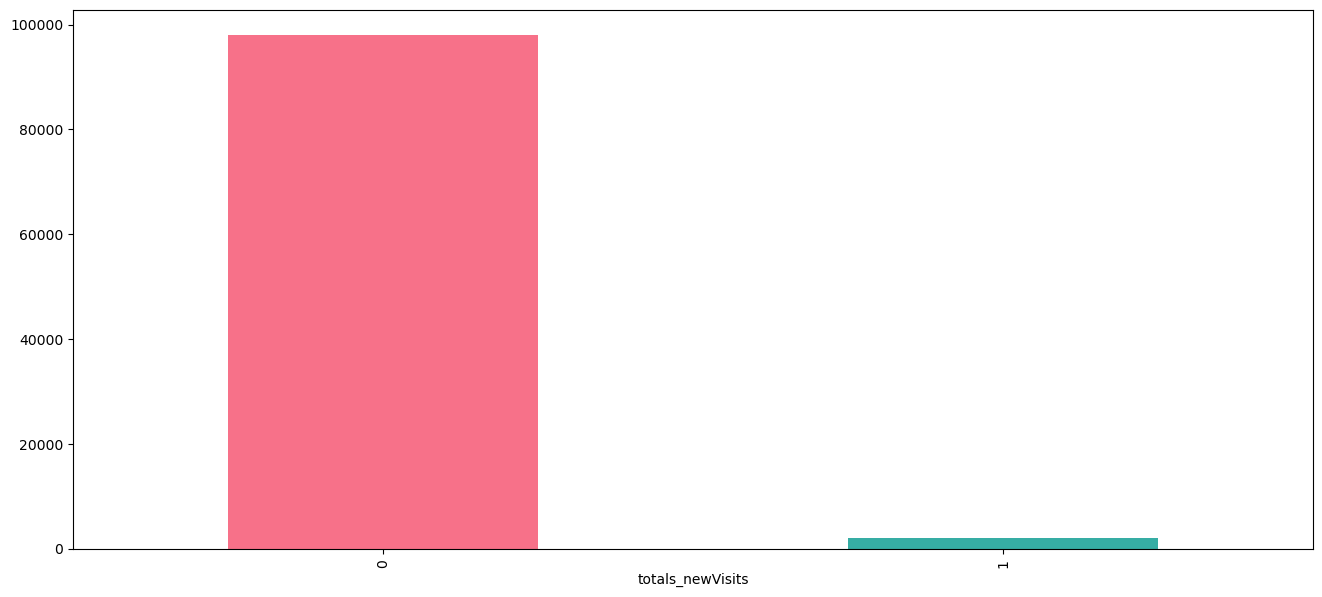

In [23]:
plot_cat("totals_newVisits")

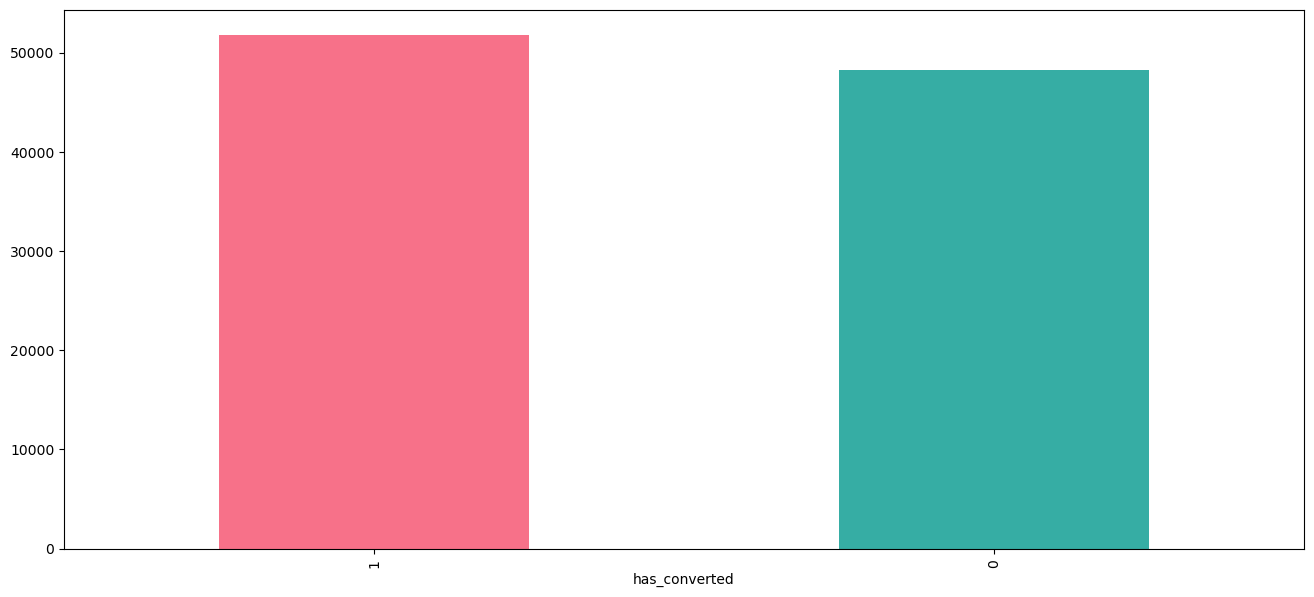

In [24]:
plot_cat("has_converted")

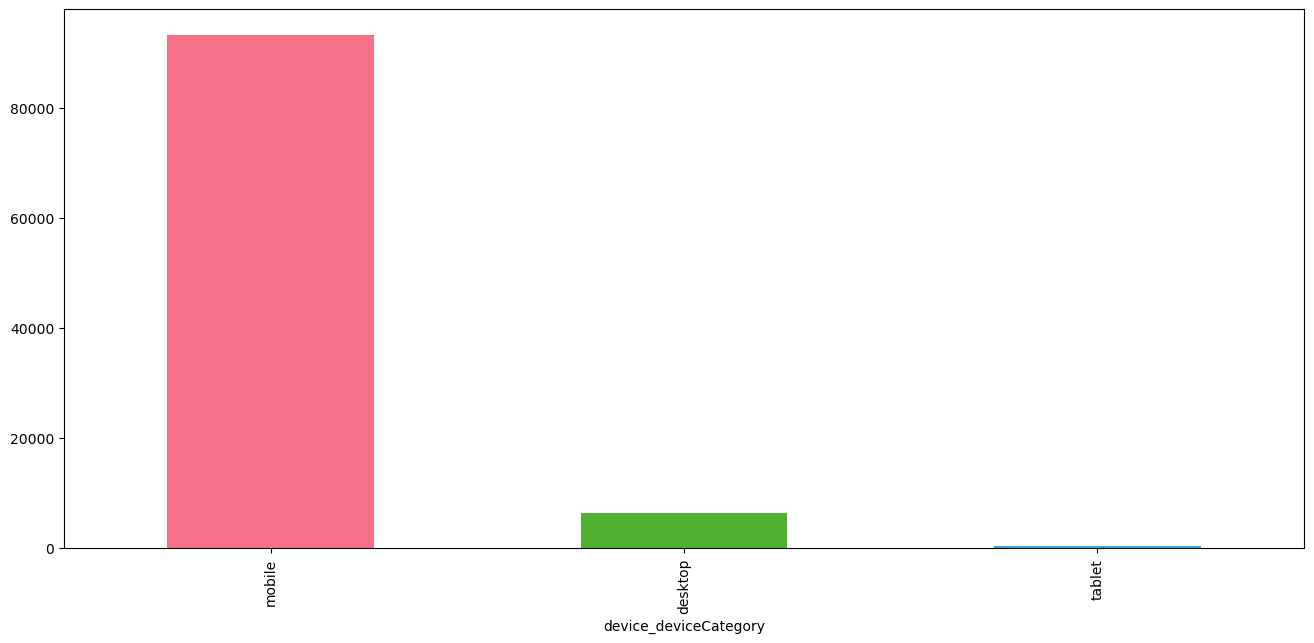

In [25]:
plot_cat("device_deviceCategory")

### Correlation

In [26]:
data_2.corr()

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
count_session,1.000000,0.856096,-0.002417,-0.088877,0.045597,0.137204,0.132393,-0.056737,-0.000628,0.003505,...,-0.005495,0.140833,0.118986,0.760016,0.044868,0.153830,0.091560,NaN,0.100391,NaN
count_hit,0.856096,1.000000,0.013933,-0.075445,0.234980,0.146535,0.142723,-0.087080,0.002825,0.005077,...,0.008262,0.158377,0.129847,0.871843,0.051623,0.093644,0.088279,NaN,0.228865,NaN
channelGrouping,-0.002417,0.013933,1.000000,0.034250,0.146864,-0.093071,-0.093838,-0.025498,0.037036,0.010981,...,0.289109,-0.040494,-0.035887,0.025076,0.011748,0.002482,0.006980,NaN,0.092067,NaN
totals_newVisits,-0.088877,-0.075445,0.034250,1.000000,0.070804,-0.236885,-0.226040,-0.009770,0.003611,0.010310,...,-0.019441,-0.205269,-0.267001,-0.071458,-0.003422,-0.010688,-0.013183,NaN,-0.036781,NaN
device_operatingSystem,0.045597,0.234980,0.146864,0.070804,1.000000,-0.151744,-0.146340,-0.056514,-0.008570,-0.007993,...,0.050595,0.044024,-0.002832,0.259398,0.021180,-0.167705,-0.022248,NaN,0.531552,NaN
device_isMobile,0.137204,0.146535,-0.093071,-0.236885,-0.151744,1.000000,0.967346,0.003020,0.005859,0.005509,...,-0.001940,0.210219,0.154807,0.133416,-0.013013,-0.022918,0.014129,NaN,0.099949,NaN
device_deviceCategory,0.132393,0.142723,-0.093838,-0.226040,-0.146340,0.967346,1.000000,0.004267,0.006415,0.006586,...,-0.005188,0.204934,0.148545,0.128811,-0.013027,-0.020917,0.012016,NaN,0.093268,NaN
geoNetwork_region,-0.056737,-0.087080,-0.025498,-0.009770,-0.056514,0.003020,0.004267,1.000000,0.076802,-0.043129,...,0.033009,-0.017886,-0.001175,-0.086958,-0.000543,-0.016474,-0.031397,NaN,-0.059370,NaN
geoNetwork_latitude,-0.000628,0.002825,0.037036,0.003611,-0.008570,0.005859,0.006415,0.076802,1.000000,0.037815,...,0.013879,-0.017459,0.002088,-0.006931,0.021652,-0.007762,-0.006867,NaN,-0.005509,NaN
geoNetwork_longitude,0.003505,0.005077,0.010981,0.010310,-0.007993,0.005509,0.006586,-0.043129,0.037815,1.000000,...,0.008865,-0.014075,-0.001048,0.000668,-0.075916,0.017745,0.007204,NaN,0.004429,NaN


C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

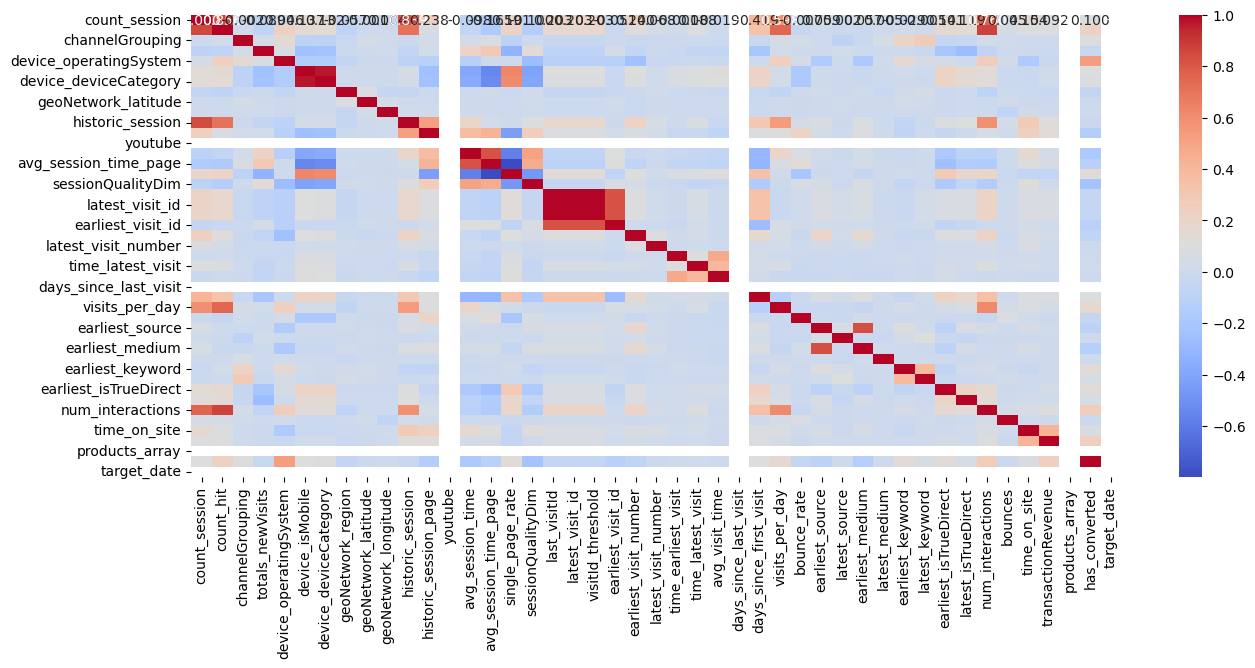

In [27]:
corr_data = data_2.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".3f")

In [28]:
hig_co = set()

for i in range(len(corr_data.columns)):
    for j in range(i):
        corr = corr_data.iloc[i,j]
        c_name  = corr_data.columns[i]
        if abs(corr) > 0.9:
            hig_co.add(c_name)

In [29]:
hig_co

{'device_deviceCategory', 'latest_visit_id', 'visitId_threshold'}

In [30]:
data_3 = data_2.drop(['device_deviceCategory', 'latest_visit_id','visitId_threshold'],axis=1)

In [31]:
data_3

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,0,0,1,1,71,25.3463,55.4209,6504,...,3,1,1,1900,0,5617,0,0,0,2021-01-01
2,28,1816,2,0,1,1,2,25.4052,55.5136,12466,...,2,1,1,3843,0,77417,1477195214,0,1,2021-01-01
3,2,299,2,0,1,1,1,24.4539,54.3773,1575,...,75,1,1,592,0,1576,0,0,0,2021-01-01
16,3,507,2,0,6,1,1,24.4539,54.3773,1000,...,74,1,1,507,0,1958,28745286,0,1,2021-01-01
20,9,1037,2,0,1,1,25,25.2048,55.2708,3659,...,3,1,1,1674,0,138440,1054124685,0,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,24.4539,54.3773,166,...,47,1,1,471,0,278,0,0,0,2021-01-01
99907,28,3071,2,0,1,1,1,24.4539,54.3773,15860,...,74,1,1,4071,0,3810,183879066,0,0,2021-01-01
99908,7,1018,2,0,6,1,25,25.2048,55.2708,859,...,74,1,1,7258,0,0,363923999,0,1,2021-01-01
99921,6,818,2,0,1,1,25,25.2048,55.2708,1772,...,10,1,1,818,0,2958,0,0,0,2021-01-01


### outliers detection and treating

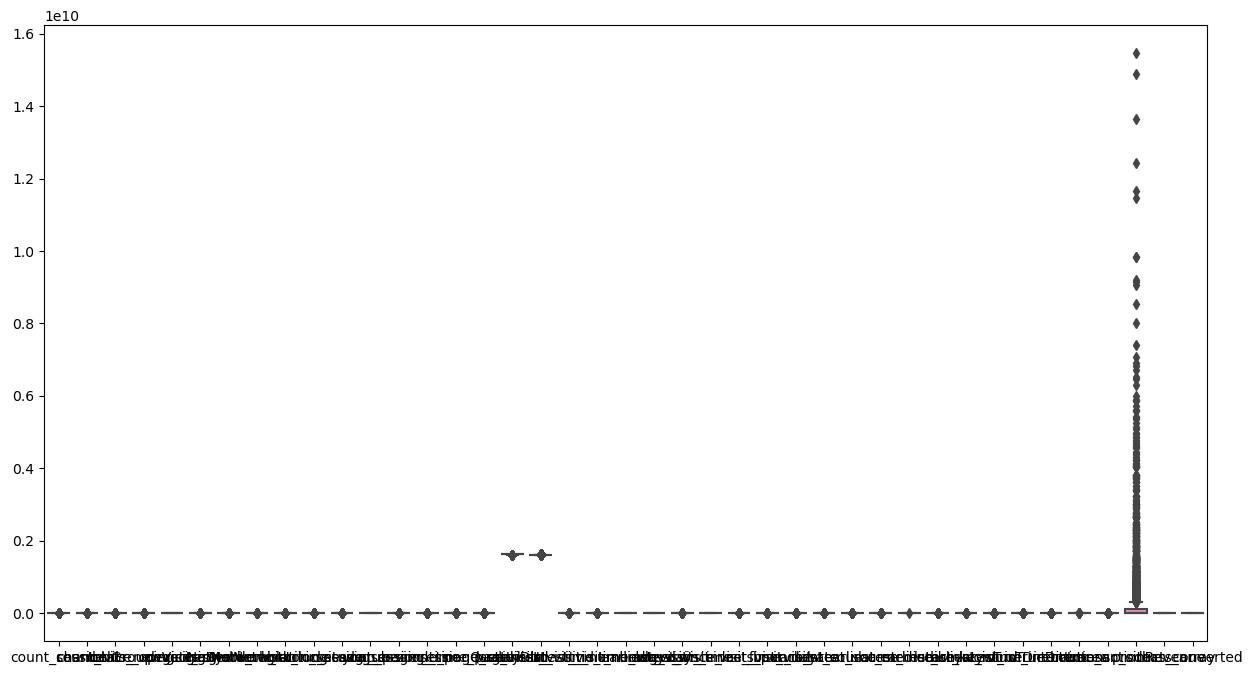

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_3)
plt.show()

In [34]:
data_3

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,0,0,1,1,71,25.3463,55.4209,6504,...,3,1,1,1900,0,5617,0,0,0,2021-01-01
2,28,1816,2,0,1,1,2,25.4052,55.5136,12466,...,2,1,1,3843,0,77417,1477195214,0,1,2021-01-01
3,2,299,2,0,1,1,1,24.4539,54.3773,1575,...,75,1,1,592,0,1576,0,0,0,2021-01-01
16,3,507,2,0,6,1,1,24.4539,54.3773,1000,...,74,1,1,507,0,1958,28745286,0,1,2021-01-01
20,9,1037,2,0,1,1,25,25.2048,55.2708,3659,...,3,1,1,1674,0,138440,1054124685,0,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,24.4539,54.3773,166,...,47,1,1,471,0,278,0,0,0,2021-01-01
99907,28,3071,2,0,1,1,1,24.4539,54.3773,15860,...,74,1,1,4071,0,3810,183879066,0,0,2021-01-01
99908,7,1018,2,0,6,1,25,25.2048,55.2708,859,...,74,1,1,7258,0,0,363923999,0,1,2021-01-01
99921,6,818,2,0,1,1,25,25.2048,55.2708,1772,...,10,1,1,818,0,2958,0,0,0,2021-01-01


In [35]:
data_3.replace([np.inf, -np.inf], np.nan, inplace=True)

In [36]:
data_3.interpolate(inplace=True)

In [37]:
data_4=data_3.drop("products_array",axis=1)

In [38]:
data_4

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,has_converted,target_date
0,9,1194,0,0,1,1,71,25.3463,55.4209,6504,...,4,3,1,1,1900,0,5617,0,0,2021-01-01
2,28,1816,2,0,1,1,2,25.4052,55.5136,12466,...,4,2,1,1,3843,0,77417,1477195214,1,2021-01-01
3,2,299,2,0,1,1,1,24.4539,54.3773,1575,...,74,75,1,1,592,0,1576,0,0,2021-01-01
16,3,507,2,0,6,1,1,24.4539,54.3773,1000,...,73,74,1,1,507,0,1958,28745286,1,2021-01-01
20,9,1037,2,0,1,1,25,25.2048,55.2708,3659,...,4,3,1,1,1674,0,138440,1054124685,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,24.4539,54.3773,166,...,46,47,1,1,471,0,278,0,0,2021-01-01
99907,28,3071,2,0,1,1,1,24.4539,54.3773,15860,...,75,74,1,1,4071,0,3810,183879066,0,2021-01-01
99908,7,1018,2,0,6,1,25,25.2048,55.2708,859,...,73,74,1,1,7258,0,0,363923999,1,2021-01-01
99921,6,818,2,0,1,1,25,25.2048,55.2708,1772,...,4,10,1,1,818,0,2958,0,0,2021-01-01


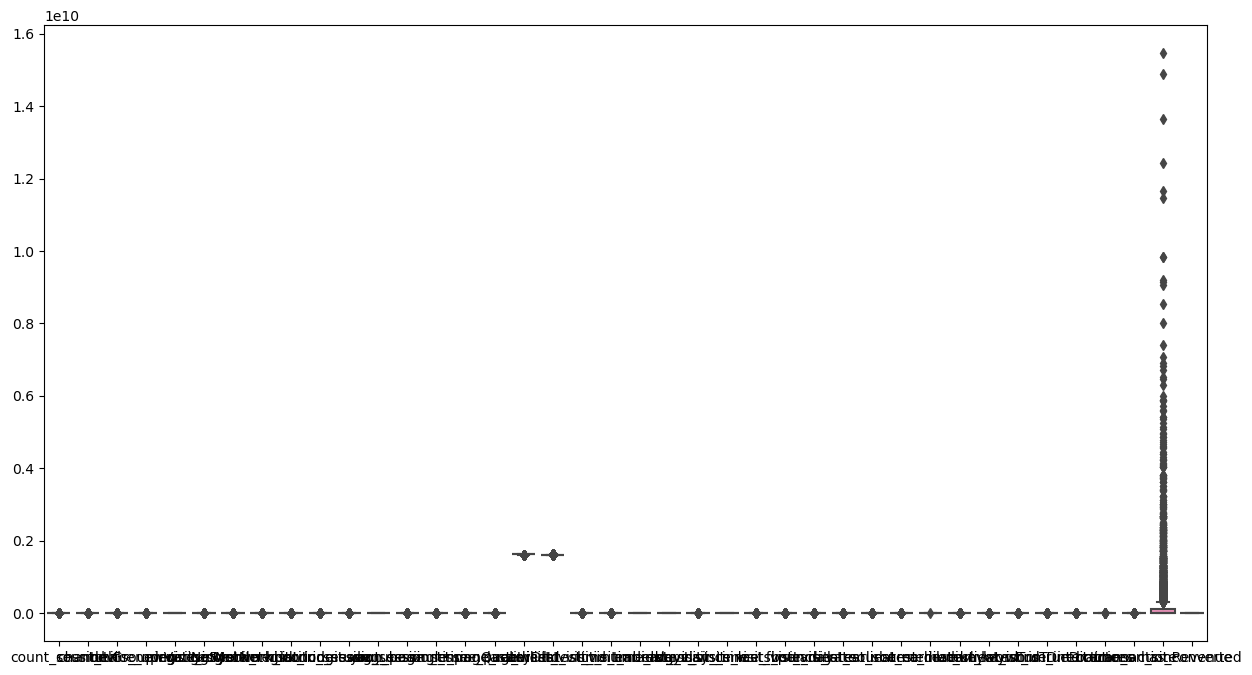

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_4)
plt.show()

In [40]:
data_5=data_4.copy()
data_5["transactionRevenue"]=1/data_4["transactionRevenue"]

In [41]:
data_5.replace([np.inf, -np.inf], np.nan, inplace=True)

In [42]:
data_5.interpolate(inplace=True)

In [43]:
data_5['transactionRevenue'] = data_5['transactionRevenue'].fillna(data_5['transactionRevenue'].mean())

In [44]:
data_5

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,has_converted,target_date
0,9,1194,0,0,1,1,71,25.3463,55.4209,6504,...,4,3,1,1,1900,0,5617,1.505052e-08,0,2021-01-01
2,28,1816,2,0,1,1,2,25.4052,55.5136,12466,...,4,2,1,1,3843,0,77417,6.769586e-10,1,2021-01-01
3,2,299,2,0,1,1,1,24.4539,54.3773,1575,...,74,75,1,1,592,0,1576,1.773264e-08,0,2021-01-01
16,3,507,2,0,6,1,1,24.4539,54.3773,1000,...,73,74,1,1,507,0,1958,3.478831e-08,1,2021-01-01
20,9,1037,2,0,1,1,25,25.2048,55.2708,3659,...,4,3,1,1,1674,0,138440,9.486544e-10,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,24.4539,54.3773,166,...,46,47,1,1,471,0,278,1.158380e-08,0,2021-01-01
99907,28,3071,2,0,1,1,1,24.4539,54.3773,15860,...,75,74,1,1,4071,0,3810,5.438357e-09,0,2021-01-01
99908,7,1018,2,0,6,1,25,25.2048,55.2708,859,...,73,74,1,1,7258,0,0,2.747826e-09,1,2021-01-01
99921,6,818,2,0,1,1,25,25.2048,55.2708,1772,...,4,10,1,1,818,0,2958,4.726206e-09,0,2021-01-01


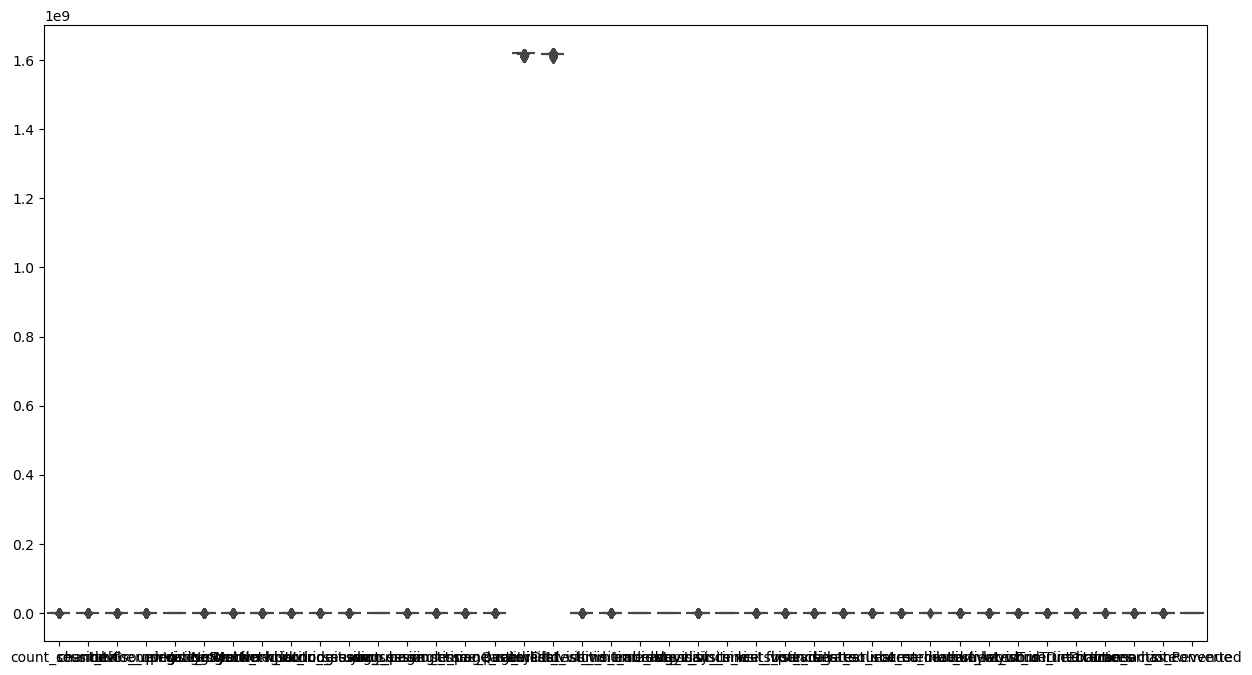

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_5)
plt.show()

In [46]:
data_6=data_5.copy()
data_6["latest_keyword"]=1/data_5["latest_keyword"]
data_6["latest_medium"]=1/data_5["latest_medium"]

In [47]:
data_6['latest_keyword'] = data_6['latest_keyword'].fillna(data_6['latest_keyword'].mean())
data_6['latest_medium'] = data_6['latest_medium'].fillna(data_6['latest_medium'].mean())

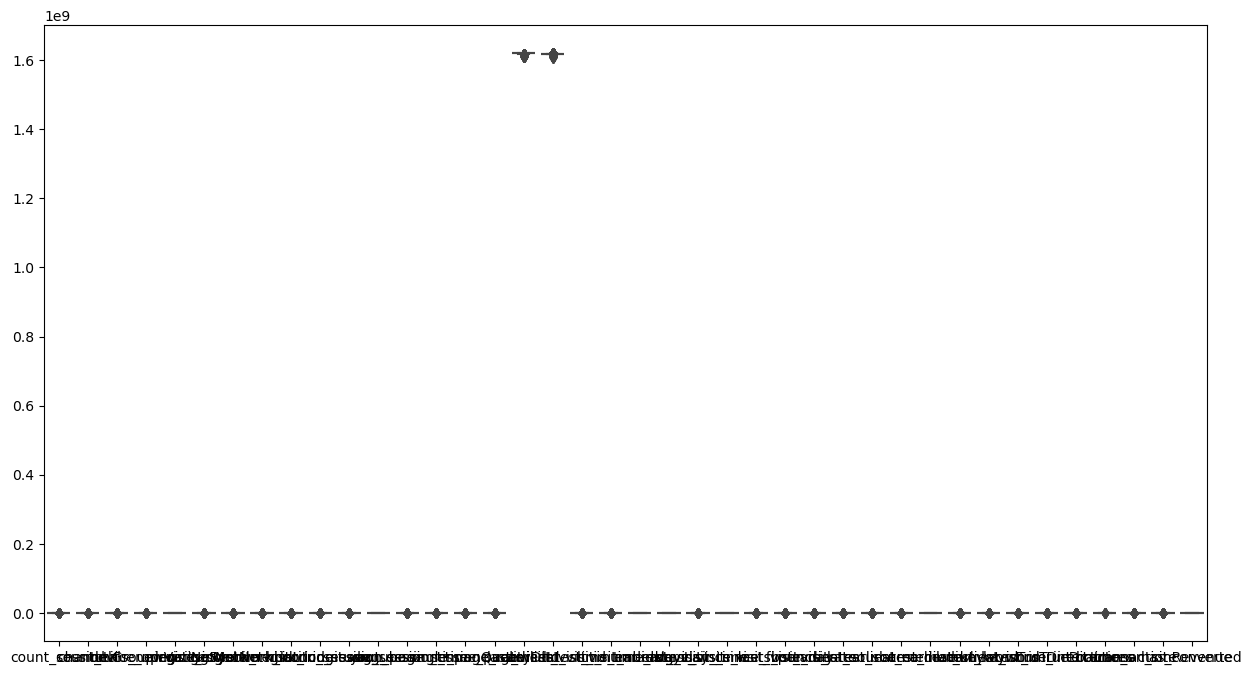

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_6)
plt.show()

In [49]:
data_6

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,has_converted,target_date
0,9,1194,0,0,1,1,71,25.3463,55.4209,6504,...,4,0.333333,1,1,1900,0,5617,1.505052e-08,0,2021-01-01
2,28,1816,2,0,1,1,2,25.4052,55.5136,12466,...,4,0.500000,1,1,3843,0,77417,6.769586e-10,1,2021-01-01
3,2,299,2,0,1,1,1,24.4539,54.3773,1575,...,74,0.013333,1,1,592,0,1576,1.773264e-08,0,2021-01-01
16,3,507,2,0,6,1,1,24.4539,54.3773,1000,...,73,0.013514,1,1,507,0,1958,3.478831e-08,1,2021-01-01
20,9,1037,2,0,1,1,25,25.2048,55.2708,3659,...,4,0.333333,1,1,1674,0,138440,9.486544e-10,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,24.4539,54.3773,166,...,46,0.021277,1,1,471,0,278,1.158380e-08,0,2021-01-01
99907,28,3071,2,0,1,1,1,24.4539,54.3773,15860,...,75,0.013514,1,1,4071,0,3810,5.438357e-09,0,2021-01-01
99908,7,1018,2,0,6,1,25,25.2048,55.2708,859,...,73,0.013514,1,1,7258,0,0,2.747826e-09,1,2021-01-01
99921,6,818,2,0,1,1,25,25.2048,55.2708,1772,...,4,0.100000,1,1,818,0,2958,4.726206e-09,0,2021-01-01


### Ploting Graphs For Undersating

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

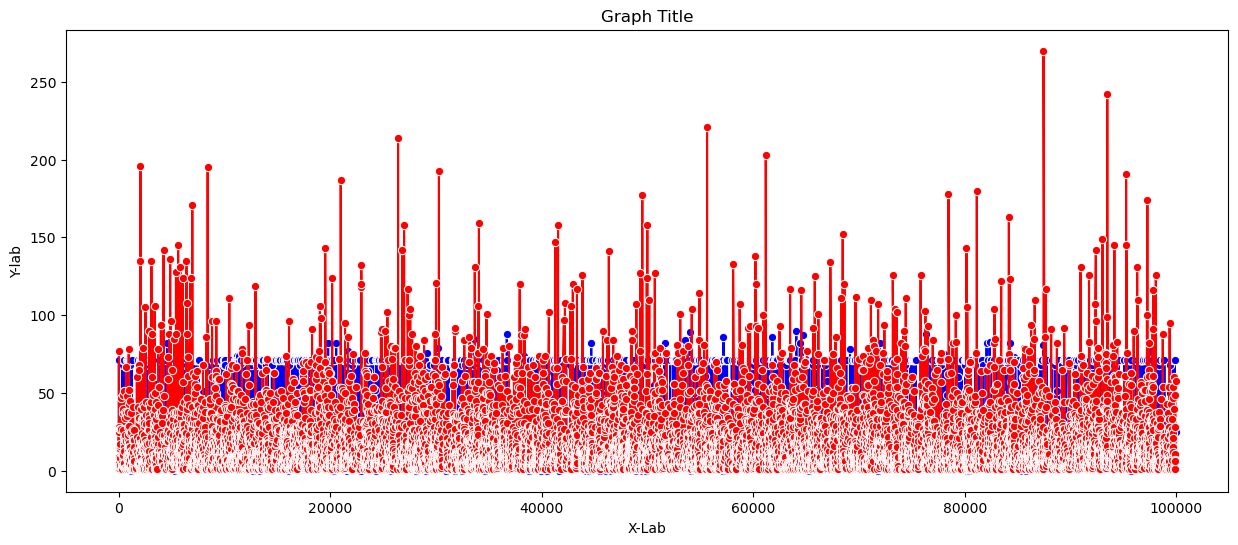

In [50]:
fig, a = plt.subplots(figsize=(15,6))

sns.lineplot(data=data_6, x=data_6.index,y="geoNetwork_region",marker='o',color='blue')
sns.lineplot(data=data_6, x=data_6.index,y="count_session",marker='o',color="red")
plt.title("Graph Title")
plt.xlabel("X-Lab")
plt.ylabel("Y-lab")
plt.show()

### Normalization

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


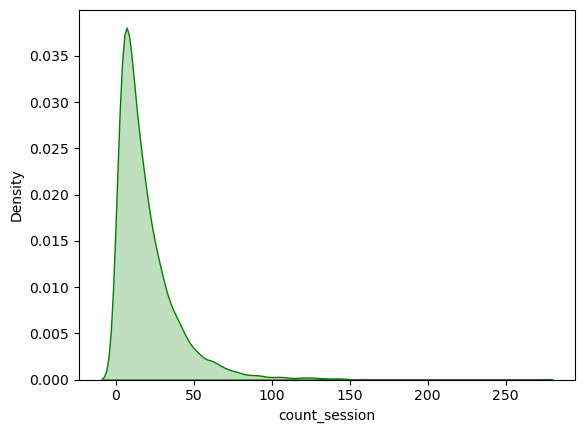

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


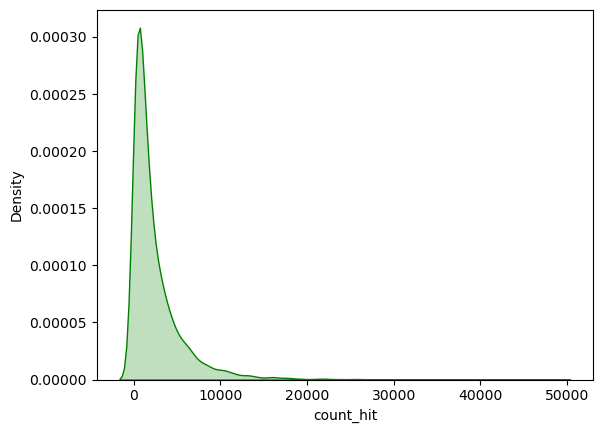

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


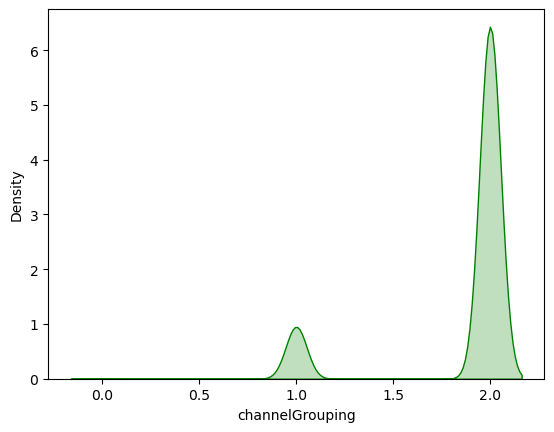

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


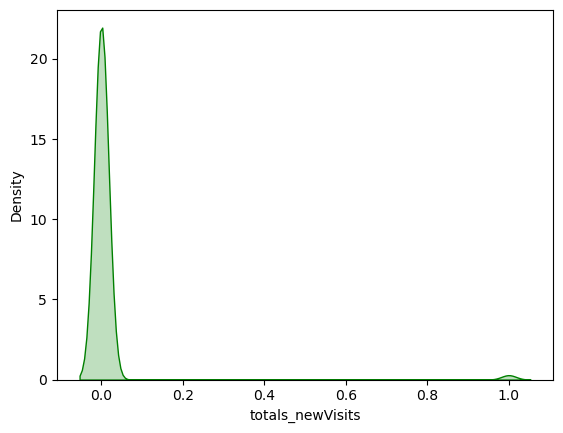

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


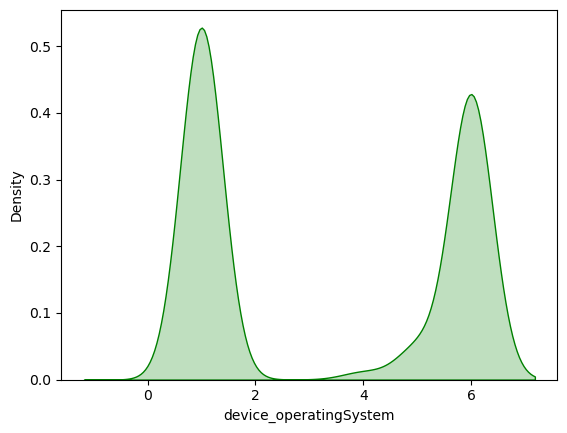

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


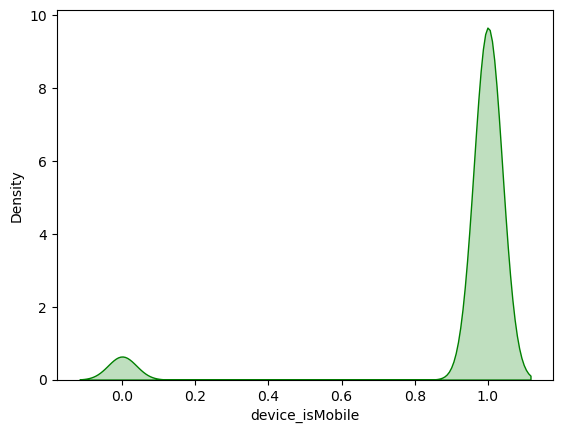

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


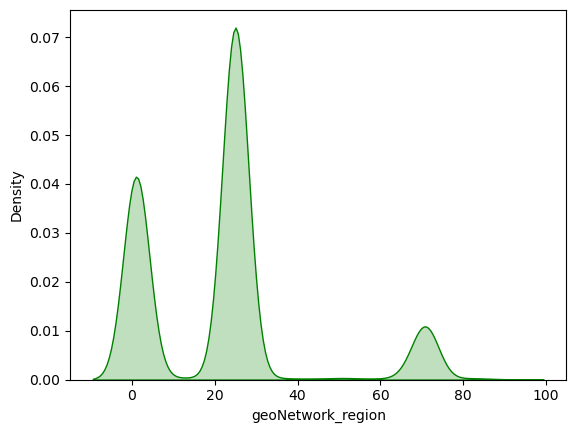

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


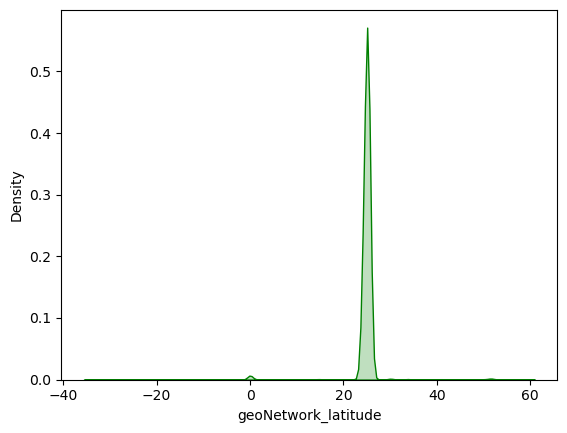

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


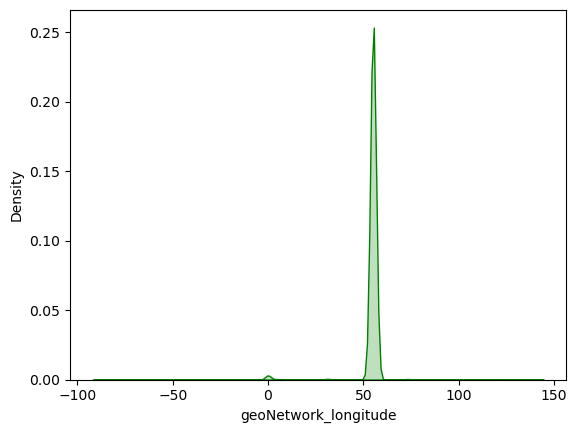

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


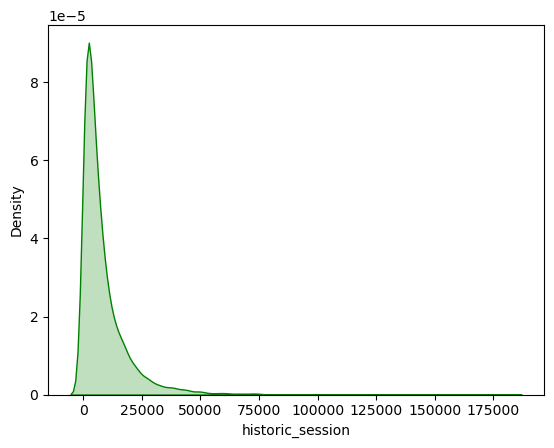

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


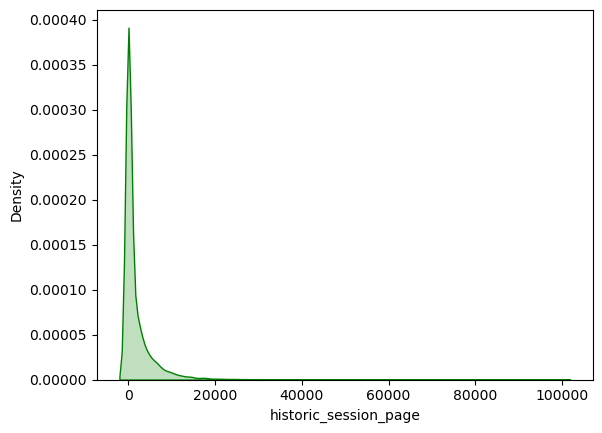

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\3090713207.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_6[i],fill = True,color='g')


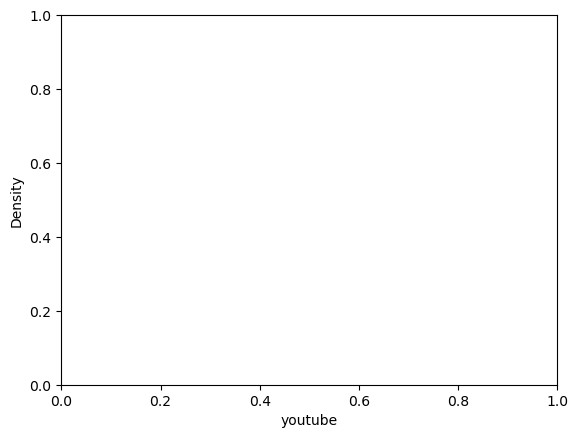

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


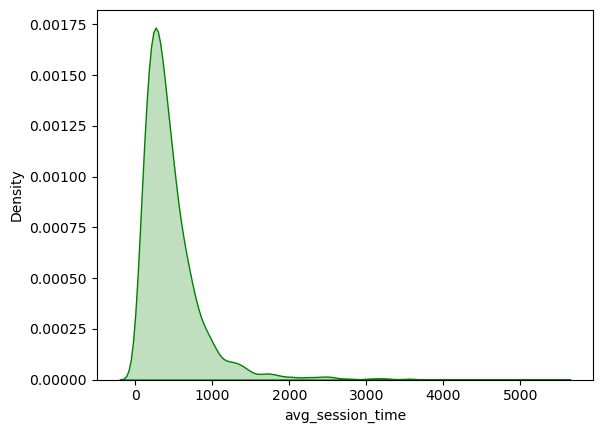

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


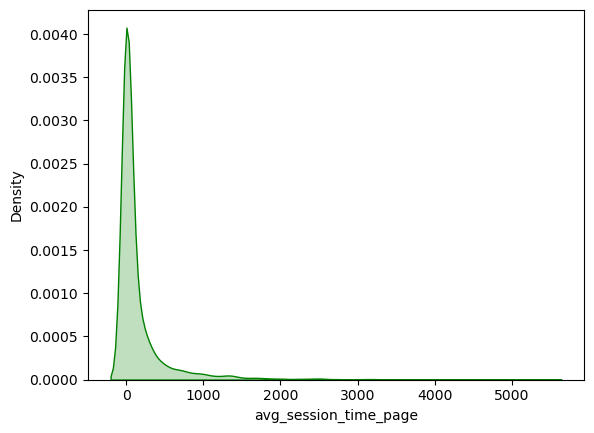

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


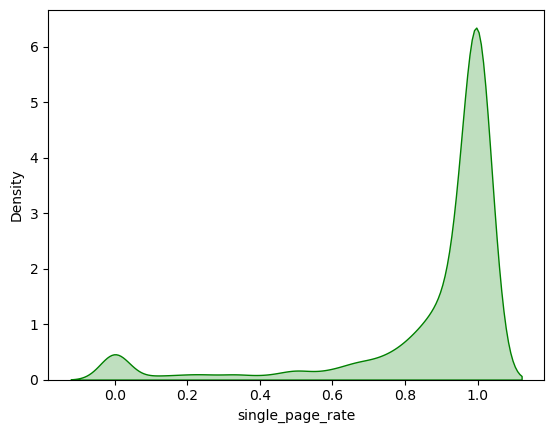

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


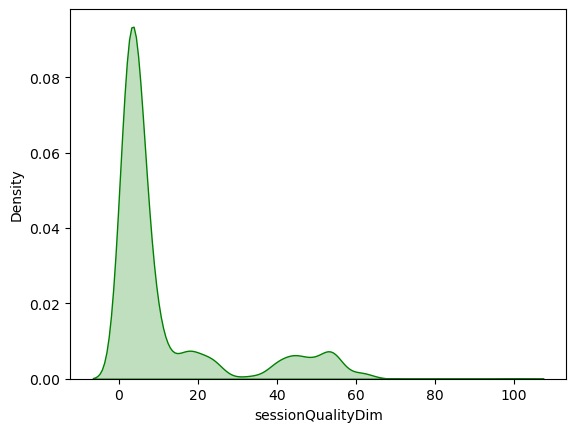

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


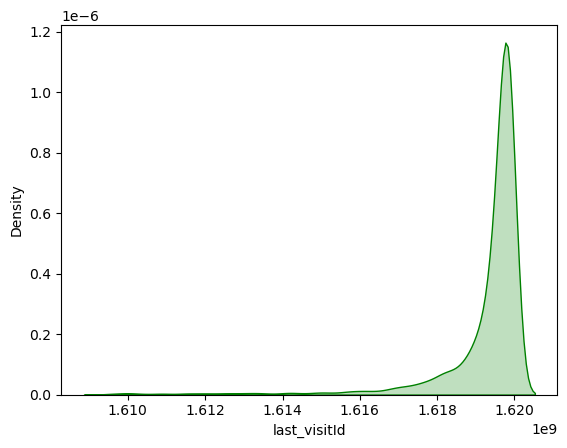

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


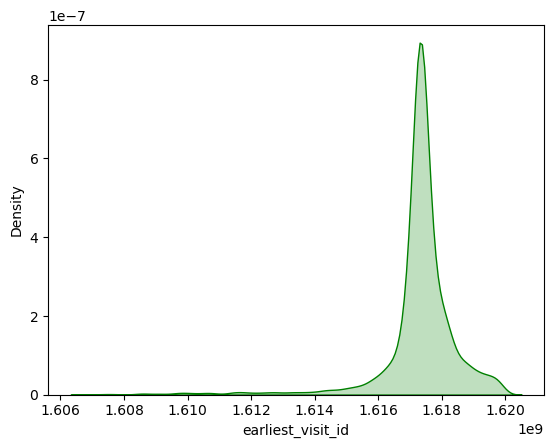

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


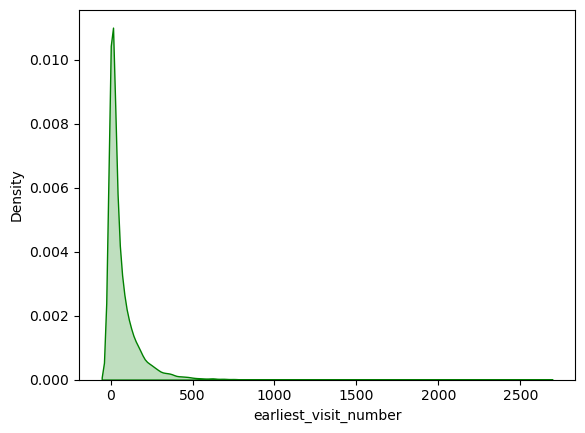

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


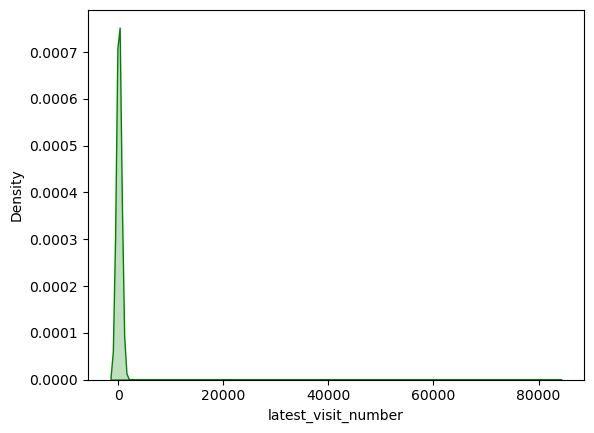

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


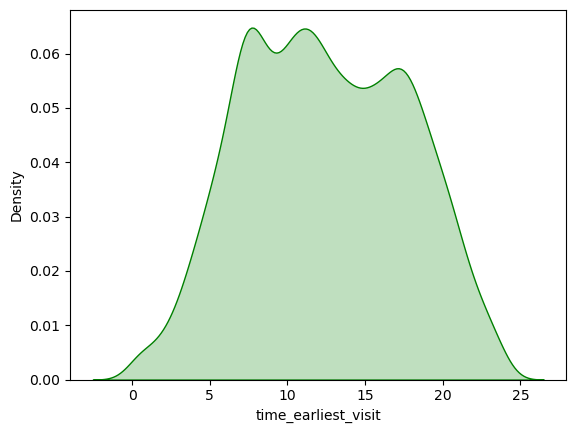

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


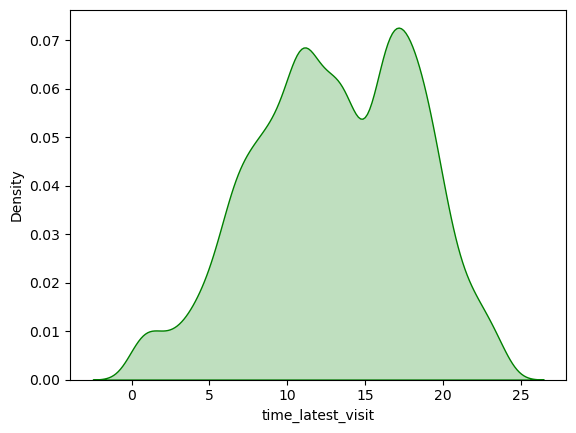

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


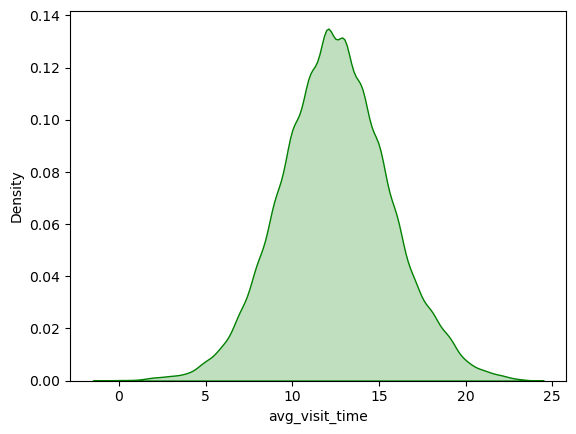

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\3090713207.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_6[i],fill = True,color='g')


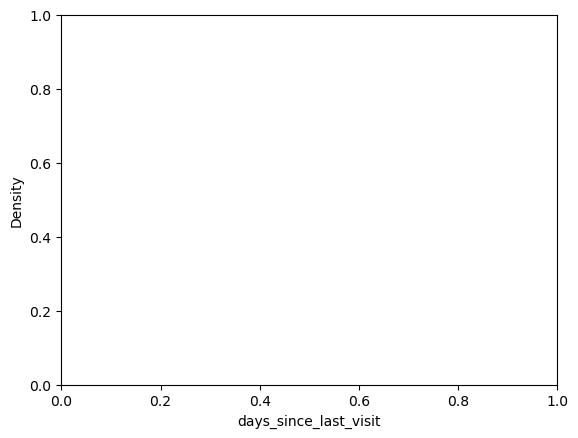

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


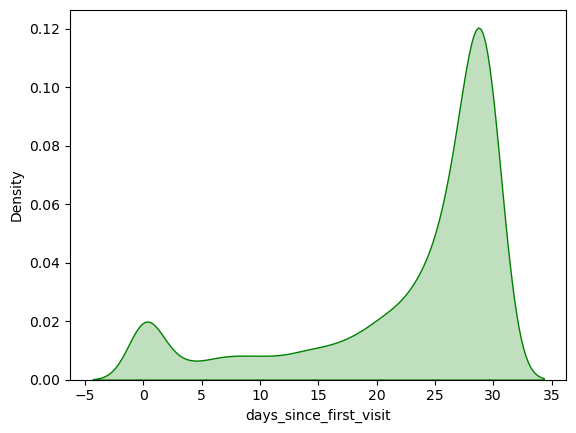

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


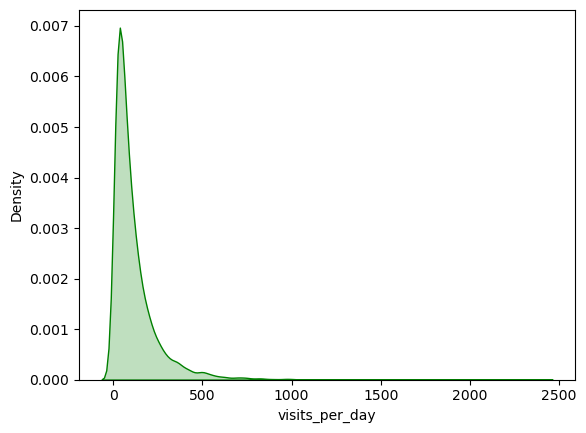

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


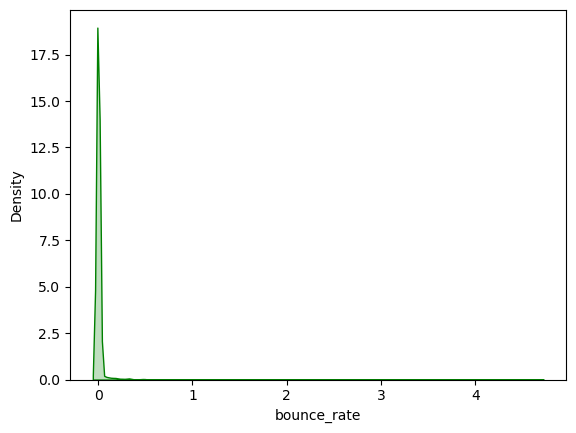

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


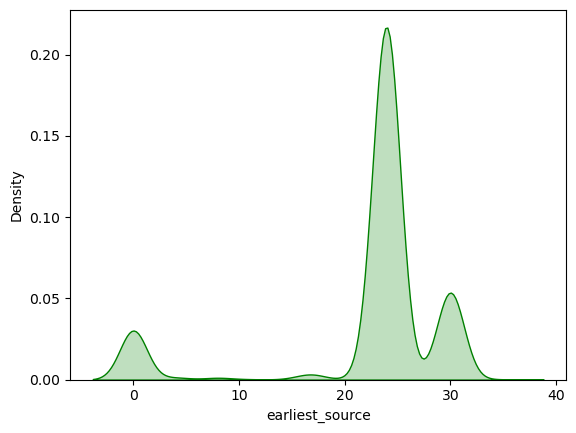

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


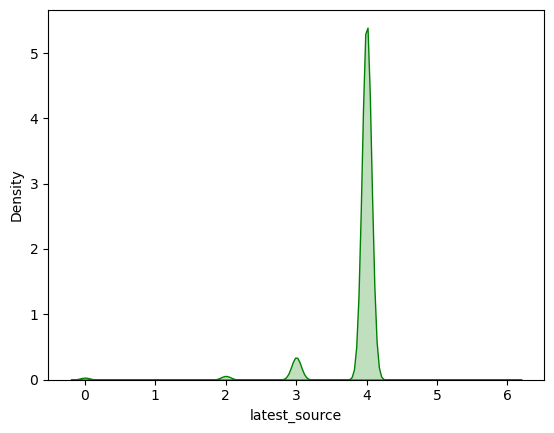

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


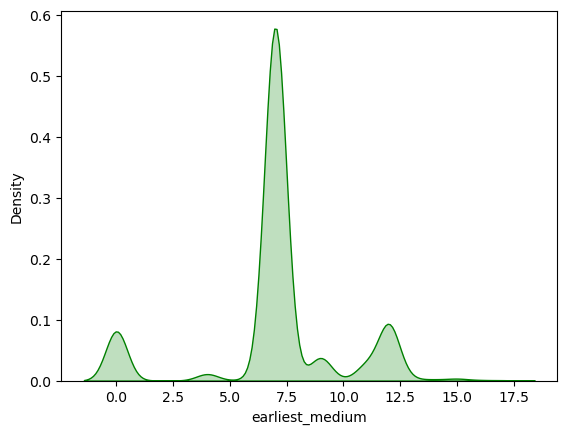

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\3090713207.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_6[i],fill = True,color='g')


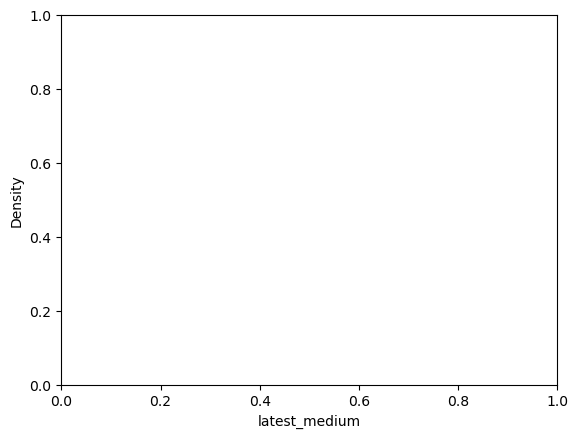

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


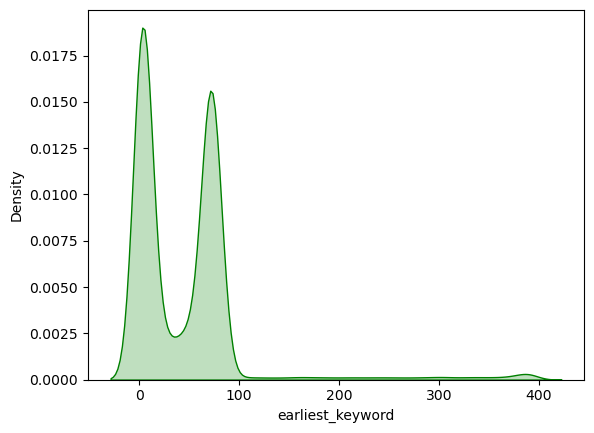

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


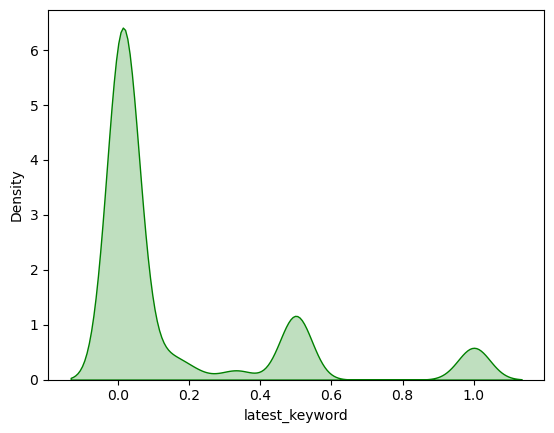

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


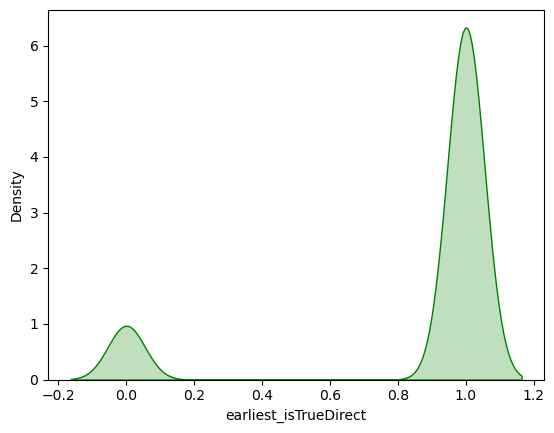

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


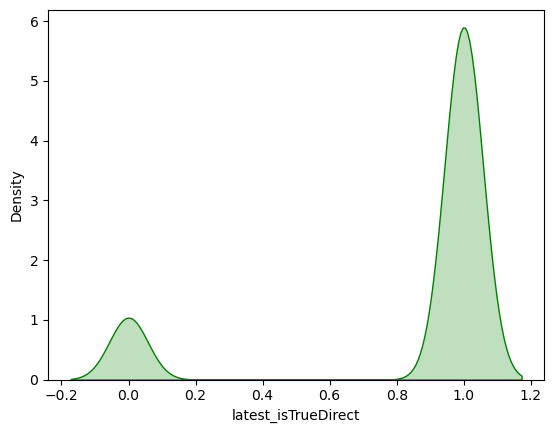

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


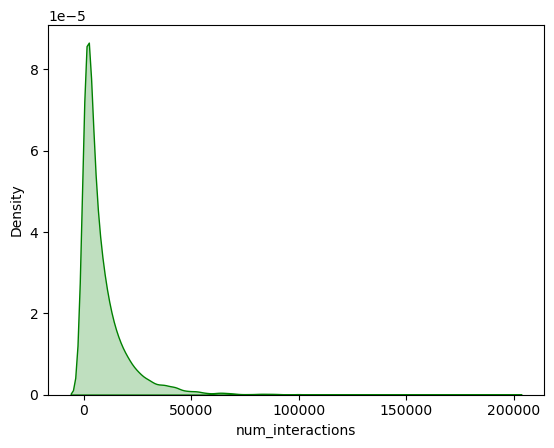

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


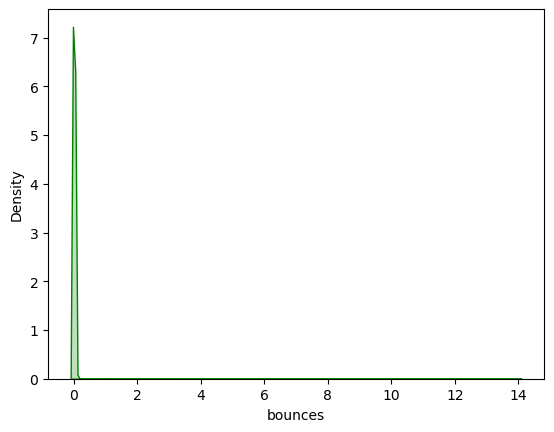

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


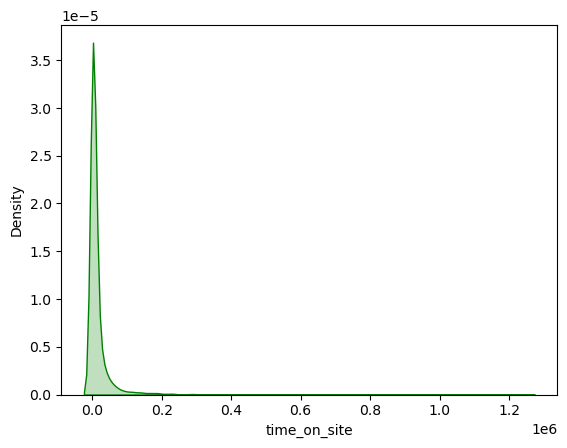

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


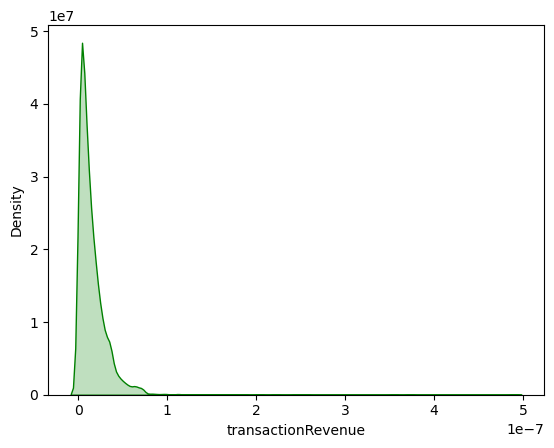

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


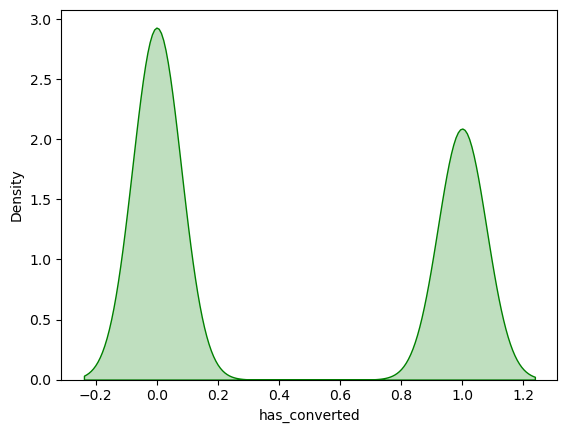

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\3090713207.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_6[i],fill = True,color='g')


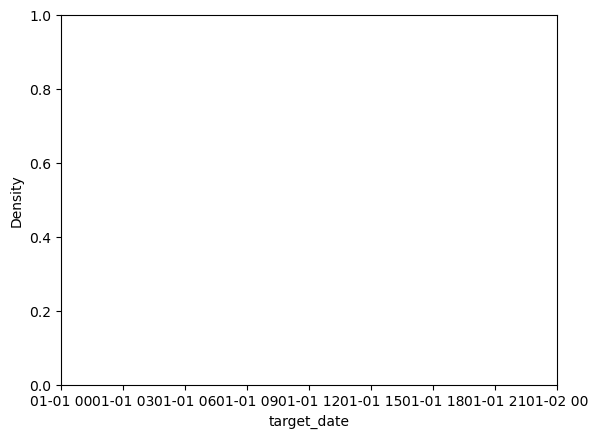

In [51]:
col_name = data_6.columns
for i in col_name:
    sns.kdeplot(data = data_6[i],fill = True,color='g')
    plt.show()

### Feature Importance

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
data_6.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_operatingSystem', 'device_isMobile', 'geoNetwork_region',
       'geoNetwork_latitude', 'geoNetwork_longitude', 'historic_session',
       'historic_session_page', 'youtube', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'last_visitId', 'earliest_visit_id', 'earliest_visit_number',
       'latest_visit_number', 'time_earliest_visit', 'time_latest_visit',
       'avg_visit_time', 'days_since_last_visit', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'num_interactions', 'bounces', 'time_on_site', 'transactionRevenue',
       'has_converted', 'target_date'],
      dtype='object')

In [55]:
data_6

,count_session,count_hit,channelGrouping,totals_newVisits,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,has_converted,target_date
0,9,1194,0,0,1,1,71,25.3463,55.4209,6504,...,4,0.333333,1,1,1900,0,5617,1.505052e-08,0,2021-01-01
2,28,1816,2,0,1,1,2,25.4052,55.5136,12466,...,4,0.500000,1,1,3843,0,77417,6.769586e-10,1,2021-01-01
3,2,299,2,0,1,1,1,24.4539,54.3773,1575,...,74,0.013333,1,1,592,0,1576,1.773264e-08,0,2021-01-01
16,3,507,2,0,6,1,1,24.4539,54.3773,1000,...,73,0.013514,1,1,507,0,1958,3.478831e-08,1,2021-01-01
20,9,1037,2,0,1,1,25,25.2048,55.2708,3659,...,4,0.333333,1,1,1674,0,138440,9.486544e-10,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,6,1,1,24.4539,54.3773,166,...,46,0.021277,1,1,471,0,278,1.158380e-08,0,2021-01-01
99907,28,3071,2,0,1,1,1,24.4539,54.3773,15860,...,75,0.013514,1,1,4071,0,3810,5.438357e-09,0,2021-01-01
99908,7,1018,2,0,6,1,25,25.2048,55.2708,859,...,73,0.013514,1,1,7258,0,0,2.747826e-09,1,2021-01-01
99921,6,818,2,0,1,1,25,25.2048,55.2708,1772,...,4,0.100000,1,1,818,0,2958,4.726206e-09,0,2021-01-01


In [56]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   count_session           9207 non-null   int64         
 1   count_hit               9207 non-null   int64         
 2   channelGrouping         9207 non-null   int32         
 3   totals_newVisits        9207 non-null   int64         
 4   device_operatingSystem  9207 non-null   int32         
 5   device_isMobile         9207 non-null   int64         
 6   geoNetwork_region       9207 non-null   int32         
 7   geoNetwork_latitude     9207 non-null   float64       
 8   geoNetwork_longitude    9207 non-null   float64       
 9   historic_session        9207 non-null   int64         
 10  historic_session_page   9207 non-null   int64         
 11  youtube                 9207 non-null   int64         
 12  avg_session_time        9207 non-null   float64     

In [57]:
data_6['latest_keyword'] = data_6['latest_keyword'].fillna(data_6['latest_keyword'].mean())
data_6['latest_medium'] = data_6['latest_medium'].fillna(data_6['latest_medium'].mean())

In [58]:
data_6.isna().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_operatingSystem    0
device_isMobile           0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword          0
latest_keyword            0
earliest_isTrueDirect     0
latest_isTrueDirect       0
num_interactions    

In [59]:
data_6=data_6.drop("transactionRevenue",axis=1)

In [60]:
X=data_6.drop("target_date",axis =1)
y=data_6["target_date"]

In [61]:
print("shape of;",X.shape)

shape of; (9207, 39)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
rf_model = RandomForestClassifier(n_estimators=20,random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

# Step 1: Check for Infinity or Large Values
print("Infinity values:", np.any(np.isinf(X_train)))
print("NaN values:", np.any(np.isnan(X_train)))

Infinity values: True
NaN values: False


In [65]:
X_train[~np.isfinite(X_train)] = np.finfo(np.float32).max

# Step 3: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [66]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [67]:
rf_model.feature_importances_ * 100

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [68]:
pd.DataFrame({
    "columns":X.columns,
    "imp_scor":rf_model.feature_importances_ *100
}).sort_values("imp_scor",ascending=False).head(20)['columns'].to_list()

['count_session',
 'earliest_medium',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_source',
 'latest_source',
 'latest_medium',
 'time_earliest_visit',
 'earliest_keyword',
 'latest_keyword',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'time_latest_visit',
 'latest_visit_number']

In [69]:
data_7=X[['count_session','time_earliest_visit','avg_visit_time','days_since_last_visit','days_since_first_visit','visits_per_day','bounce_rate','earliest_source','latest_source','earliest_medium','latest_medium','earliest_keyword','latest_keyword','earliest_isTrueDirect','latest_isTrueDirect','num_interactions','bounces','time_on_site','has_converted','time_latest_visit']]

In [70]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   time_earliest_visit     9207 non-null   float64
 2   avg_visit_time          9207 non-null   int64  
 3   days_since_last_visit   9207 non-null   int64  
 4   days_since_first_visit  9207 non-null   int64  
 5   visits_per_day          9207 non-null   float64
 6   bounce_rate             9207 non-null   float64
 7   earliest_source         9207 non-null   int32  
 8   latest_source           9207 non-null   int32  
 9   earliest_medium         9207 non-null   int32  
 10  latest_medium           9207 non-null   float64
 11  earliest_keyword        9207 non-null   int32  
 12  latest_keyword          9207 non-null   float64
 13  earliest_isTrueDirect   9207 non-null   int64  
 14  latest_isTrueDirect     9207 non-null   int6

In [71]:
data_7[np.isinf(data_7)] = np.nan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_8 = imputer.fit_transform(data_7)

C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\4278885478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7[np.isinf(data_7)] = np.nan
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\4278885478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7[np.isinf(data_7)] = np.nan


In [72]:
data_7["latest_medium"]=data_7["latest_medium"].fillna(0)
data_7["latest_keyword"]=data_7["latest_keyword"].fillna(0)

C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\3499288203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7["latest_medium"]=data_7["latest_medium"].fillna(0)
C:\Users\SPLPT 959\AppData\Local\Temp\ipykernel_6832\3499288203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7["latest_keyword"]=data_7["latest_keyword"].fillna(0)


In [73]:
data_7.isna().sum()

count_session             0
time_earliest_visit       0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword          0
latest_keyword            0
earliest_isTrueDirect     0
latest_isTrueDirect       0
num_interactions          0
bounces                   0
time_on_site              0
has_converted             0
time_latest_visit         0
dtype: int64

### Random Forest Model

In [74]:
x = data_7.drop('has_converted',axis=1)
y = data_7['has_converted']

In [75]:
train_data, test_data, train_lab, test_lab = train_test_split(x,y, test_size=0.2, random_state=40)

In [76]:
model_rf = RandomForestClassifier(n_estimators=150)

In [77]:
model_rf.fit(train_data,train_lab)

RandomForestClassifier(n_estimators=150)

In [78]:
train_pred = model_rf.predict(train_data)
test_pred = model_rf.predict(test_data)

### Train Perfomance Metrics

In [79]:
acc = accuracy_score(train_lab,train_pred)
pre = precision_score(train_lab,train_pred,average="micro")
rec = recall_score(train_lab,train_pred,average="micro")
f1 = f1_score(train_lab,train_pred,average="micro")

print(acc,
pre,
rec,
f1 )

1.0 1.0 1.0 1.0


### Test Performance Metrics

In [80]:
acc = accuracy_score(test_lab,test_pred)
pre = precision_score(test_lab,test_pred,average="micro")
rec = recall_score(test_lab,test_pred,average="micro")
f1 = f1_score(test_lab,test_pred,average="micro")

print(acc,
pre,
rec,
f1 )

0.7719869706840391 0.7719869706840391 0.7719869706840391 0.771986970684039


In [81]:
confusion_matrix(test_lab,test_pred)

array([[919, 162],
       [258, 503]], dtype=int64)

In [82]:
len(test_lab)

1842

### Classification Report

In [83]:
print(classification_report(test_lab,test_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1081
           1       0.76      0.66      0.71       761

    accuracy                           0.77      1842
   macro avg       0.77      0.76      0.76      1842
weighted avg       0.77      0.77      0.77      1842



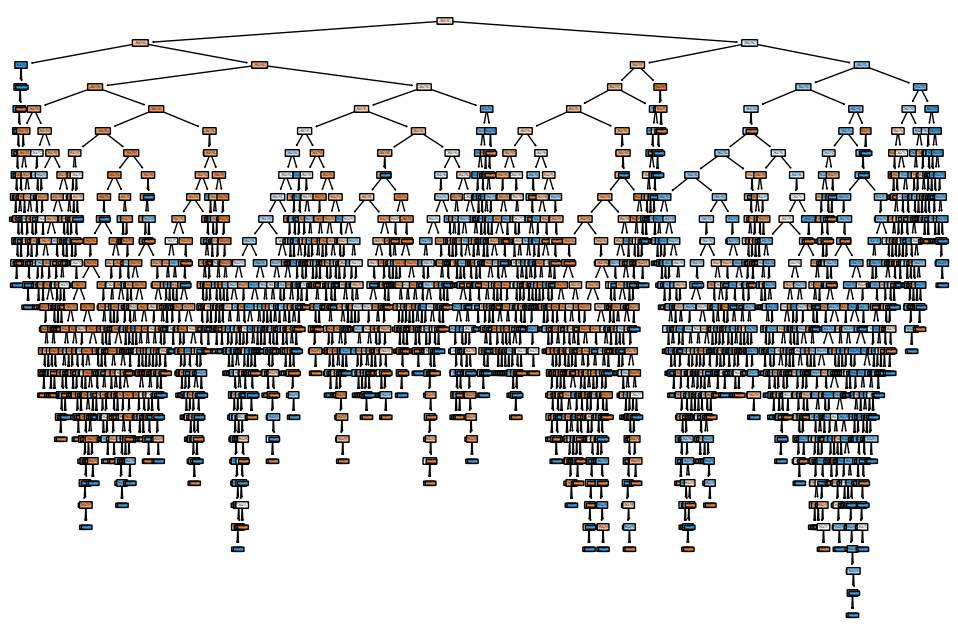

In [84]:
try:
    plt.figure(figsize=(12, 8))
    plot_tree(model_rf.estimators_[0],filled=True, rounded=True)
    plt.show()
except KeyboardInterrupt:
    print("Execution interrupted by the user")

In [85]:
plt.savefig("RF-tree.png")

<Figure size 640x480 with 0 Axes>

In [86]:
with open("model_rf.pkl","wb") as mf:
    pickle.dump(model_rf,mf)

In [87]:
with open("model_rf.pkl","rb") as mf:
    new_model = pickle.load(mf)

In [88]:
 new_model

RandomForestClassifier(n_estimators=150)

In [89]:

test_data = np.array([[100, 92, 9000000, 612,36.0788,370,-81.1781,6574,987,674,93735,36373,33838,675,98,6,65,8,665 ]])

In [90]:
predicted = new_model.predict(test_data)[0]
if predicted:
    print(predicted)
else: 
    print("Sorry Something Wrong")

Sorry Something Wrong


C:\Users\SPLPT 959\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [91]:
new_model.predict_proba(test_data)

C:\Users\SPLPT 959\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.51333333, 0.48666667]])

### Desicion Tree Model

In [92]:
train_data, test_data, train_lab, test_lab = train_test_split(x,y, test_size=0.2, random_state=45)

In [93]:
train_data

,count_session,time_earliest_visit,avg_visit_time,days_since_last_visit,days_since_first_visit,visits_per_day,bounce_rate,earliest_source,latest_source,earliest_medium,latest_medium,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,time_latest_visit
65909,1,13.37,13,0,0,225.000000,0.0,23,3,7,1.0,40,0.027778,0,0,225,0,14839,13.37
54444,25,19.28,14,0,28,56.241379,0.0,24,4,7,1.0,74,0.013333,1,1,2693,0,1688,18.63
27776,25,17.88,14,0,25,118.192308,0.0,30,4,9,1.0,4,0.004149,1,1,13838,0,46076,18.27
10666,68,15.85,11,0,30,432.709677,0.0,0,4,0,1.0,4,0.021277,1,1,36995,0,0,13.47
65038,39,14.18,15,0,14,75.066667,0.0,24,4,7,1.0,68,0.013333,1,1,1126,0,11208,16.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95087,16,8.37,13,0,27,36.357143,0.0,24,4,7,1.0,73,0.014286,1,1,12061,0,327,10.97
2044,135,17.27,13,0,30,284.935484,0.0,24,4,7,1.0,68,0.014286,1,1,30991,0,138584,16.92
65295,9,20.15,12,0,19,53.950000,0.0,24,4,7,1.0,75,0.013158,1,1,1275,0,5085,12.20
71172,26,11.12,12,0,30,112.774193,0.0,30,4,12,1.0,4,0.001821,1,1,7517,0,16128,21.45


In [94]:
model1 = DecisionTreeClassifier(
    
    criterion='entropy',   #### Performance
    splitter='best',
    max_depth=10,  #### Performance
    min_samples_split=2,  #### Performance
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,  #### Performance
    random_state=45,  #### Performance
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

In [95]:
model1

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [96]:
model1.fit(train_data,train_lab)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [97]:
list(x.columns)

['count_session',
 'time_earliest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_source',
 'latest_source',
 'earliest_medium',
 'latest_medium',
 'earliest_keyword',
 'latest_keyword',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'time_latest_visit']

In [98]:
unique_classes = set(train_pred)  # Assuming train_pred contains your model predictions
class_names = ['0', '1']  # Adjust based on your actual class names
if len(unique_classes) != len(class_names):
    print("Number of classes does not match. Check class_names.")

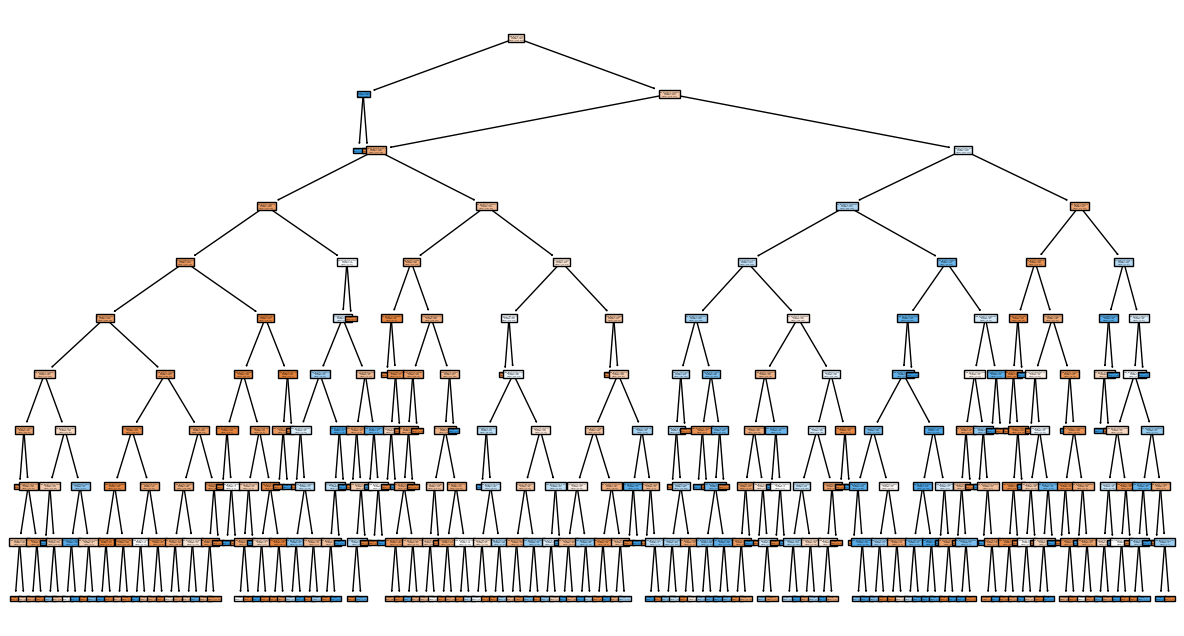

In [99]:
plt.figure(figsize=(15,8))
plot_tree(model1, feature_names=list(x.columns),filled=True)
plt.show()

In [100]:
plt.savefig("d-tree.png")

<Figure size 640x480 with 0 Axes>

In [101]:
train_pred = model1.predict(train_data)
test_pred = model1.predict(test_data)

### Train Perfomance Metrics

In [102]:
acc = accuracy_score(train_lab,train_pred)
pre = precision_score(train_lab,train_pred,average="micro")
rec = recall_score(train_lab,train_pred,average="micro")
f1_ = f1_score(train_lab,train_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(train_lab,train_pred)

acc: 0.8176510522742702 
Precision: 0.8176510522742702 
recall:  0.8176510522742702 
F1-score:  0.8176510522742702


array([[3674,  648],
       [ 695, 2348]], dtype=int64)

### Test Performance Metrics

In [103]:
acc = accuracy_score(test_lab,test_pred)
pre = precision_score(test_lab,test_pred,average="micro")
rec = recall_score(test_lab,test_pred,average="micro")
f1_ = f1_score(test_lab,test_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(test_lab,test_pred)

acc: 0.7361563517915309 
Precision: 0.7361563517915309 
recall:  0.7361563517915309 
F1-score:  0.7361563517915309


array([[815, 237],
       [249, 541]], dtype=int64)

### Gradient Boost Model

In [104]:
train_data, test_data, train_lab, test_lab = train_test_split(x,y, test_size=0.2, random_state=42)

In [105]:
model_gb = GradientBoostingClassifier(learning_rate=0.12,n_estimators=150)

In [106]:
model_gb.fit(train_data,train_lab)

GradientBoostingClassifier(learning_rate=0.12, n_estimators=150)

In [107]:
train_pred = model_gb.predict(train_data)
test_pred = model_gb.predict(test_data)

### Train Performance Metrics

In [108]:
acc = accuracy_score(train_lab,train_pred)
pre = precision_score(train_lab,train_pred,average="micro")
rec = recall_score(train_lab,train_pred,average="micro")
f1_ = f1_score(train_lab,train_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(train_lab,train_pred)

acc: 0.8055668703326544 
Precision: 0.8055668703326544 
recall:  0.8055668703326544 
F1-score:  0.8055668703326544


array([[3800,  533],
       [ 899, 2133]], dtype=int64)

### Test Performance metrics

In [109]:
acc = accuracy_score(test_lab,test_pred)
pre = precision_score(test_lab,test_pred,average="micro")
rec = recall_score(test_lab,test_pred,average="micro")
f1_ = f1_score(test_lab,test_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(test_lab,test_pred)

acc: 0.7817589576547231 
Precision: 0.7817589576547231 
recall:  0.7817589576547231 
F1-score:  0.7817589576547231


array([[898, 143],
       [259, 542]], dtype=int64)

### Classifiaction Report

In [110]:
print(classification_report(train_lab,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4333
           1       0.80      0.70      0.75      3032

    accuracy                           0.81      7365
   macro avg       0.80      0.79      0.80      7365
weighted avg       0.81      0.81      0.80      7365



In [111]:
print(classification_report(test_lab,test_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1041
           1       0.79      0.68      0.73       801

    accuracy                           0.78      1842
   macro avg       0.78      0.77      0.77      1842
weighted avg       0.78      0.78      0.78      1842



In [112]:
test_lab.value_counts()

has_converted
0    1041
1     801
Name: count, dtype: int64

# piechart for featured cataogery

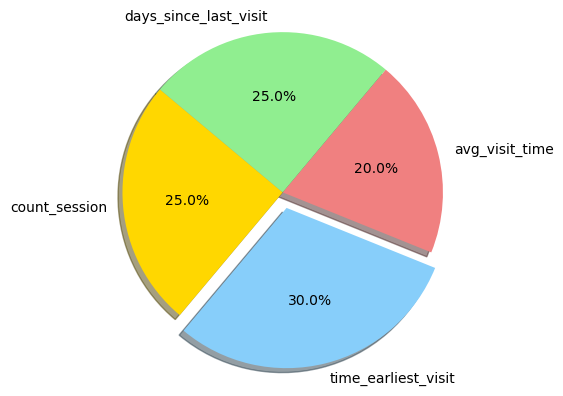

In [113]:
data_7 = ['count_session','time_earliest_visit','avg_visit_time','days_since_last_visit','days_since_first_visit','visits_per_day','bounce_rate','earliest_source','latest_source','earliest_medium','latest_medium','earliest_keyword','latest_keyword','earliest_isTrueDirect','latest_isTrueDirect','num_interactions','bounces','time_on_site','has_converted','time_latest_visit']
sizes = [25, 30, 20, 25]  # percentages, should sum up to 100

# Colors for each category
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']

# Exploding the 2nd slice (Category B)
explode = (0, 0.1, 0, 0)

fig = plt.subplots()
# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=data_7[:len(sizes)], colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()